In [1]:
import numpy as np
#from scipy import linalg as LA

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

import h5py
import pickle


import fastjet as fj
import Nsubjettiness as Nsub
import numpy as np
import pandas as pd

import glob as glob
import time

In [2]:
fnames = ['/home/jack/projects/EMD_VAE/compression_project/data/new_bigger/h_signal/h_signal_1_1_' + str(i) + '.dat' for i in range(1,26)]
#fn = '/home/jack/projects/EMD_VAE/compression_project/data/new_bigger/h_signal/h_signal_1_1_1.dat'
data = np.loadtxt(fnames[2])

In [3]:
numevents = 10000
columns = []
for i in range(50):
    columns += ['pT' + str(i), 'eta' + str(i), 'phi' + str(i), 'E' + str(i)]

In [7]:
# numevents = 50000
#numevents = 1000
# events = [data[data[:,0] == i] for i in range(numevents)]



In [26]:
for fn in fnames:
    
    print("Now processing file", fn)
    
    data = np.loadtxt(fn)
    events = [data[data[:,0] == i] for i in range(numevents)]

    numpass=0
    maxminpT = []

    pass_indices = []

    jet_def = fj.JetDefinition(fj.kt_algorithm, 1.0)


    for n, event in enumerate(events):
#         if n % 1000 == 0:
#             print("Now processing event", n, "of", numevents)
        PIDs = event[:,1]
        pTs = event[:,2]
        eta = event[:,3]
        ismuon = np.logical_and(PIDs == 13,np.abs(eta) < 2.5)
        isantimuon = np.logical_and(PIDs == -13,np.abs(eta) < 2.5)
        if np.sum(ismuon) < 1 or np.sum(isantimuon) < 1:
            continue
        pTmu = np.max(pTs[ismuon])
        pTantimu = np.max(pTs[isantimuon])
        maxminpT += [np.min([pTmu,pTantimu])]
        if pTmu < 4.5 or pTantimu < 4.5:
            continue
        numpass += 1
        pass_indices += [n]

    print("Numpass =",numpass,". Fraction =",1.*numpass/len(events))
    
    
    out_data = np.zeros((numpass,50,4))

    HT_muon = []
    HT_tot = []

    for n, index in enumerate(pass_indices):
        if n % 1000 == 0:
            print("Now processing event", n, "of", numpass)

        event = np.array(events[index])
        pTs = event[:,2]
        eta = event[:,3]

        PIDs = event[:,1]
        neutrinos = [12,14,16]

        ismuon = np.logical_and(PIDs == 13,np.abs(eta) < 2.5)
        isantimuon = np.logical_and(PIDs == -13,np.abs(eta) < 2.5)

        mu = np.argmax(pTs*ismuon)
        antimu = np.argmax(pTs*isantimuon)

        rejected = np.zeros(len(event), dtype=bool)
        rejected[mu] = True
        rejected[antimu] = True

        HT_tot += [np.sum(event[:,2])]

        pTs_muon = event[rejected,2]
        HT_muon += [np.sum(pTs_muon)]

        for neutPID in neutrinos:
            rejected += (np.abs(PIDs) == neutPID)

        event = event[np.logical_not(rejected)]


        pTs = event[:,2]
        etas = event[:,3]
        phis = event[:,4]
        Es = event[:,5]

        pxs = pTs*np.cos(phis)
        pys = pTs*np.sin(phis)
        pzs = pTs*np.sinh(etas)

        numparts = len(pTs)

        particles = []
        for i in range(numparts):
            particles += [fj.PseudoJet(pxs[i],pys[i],pzs[i],Es[i])]
        sequence = fj.ClusterSequence(particles,jet_def)
        reclustered = fj.sorted_by_pt(sequence.exclusive_jets(min(50,numparts)))


        numparts = min(50,len(reclustered))
        for j in range(numparts):
            particle = reclustered[j]
            out_data[n,j,0] = particle.pt()
            out_data[n,j,1] = particle.eta()
            out_data[n,j,2] = particle.phi() - np.pi
            out_data[n,j,3] = particle.E()
            
    out_data = out_data.reshape((-1,50*4))
    
    outstore = pd.HDFStore("/home/jack/projects/EMD_VAE/compression_project/data/h_signal_big.h5")
    dictionary = dict(zip(columns, out_data.T))
    out_df = pd.DataFrame(dictionary,columns=columns)
    outstore.append('particles',out_df)
    outstore.close()
    
    

Now processing file /home/jack/projects/EMD_VAE/compression_project/data/new_bigger/h_signal/h_signal_1_1_1.dat
Numpass = 6969 . Fraction = 0.6969
Now processing event 0 of 6969
Now processing event 1000 of 6969
Now processing event 2000 of 6969
Now processing event 3000 of 6969
Now processing event 4000 of 6969
Now processing event 5000 of 6969
Now processing event 6000 of 6969
Now processing file /home/jack/projects/EMD_VAE/compression_project/data/new_bigger/h_signal/h_signal_1_1_2.dat
Numpass = 6947 . Fraction = 0.6947
Now processing event 0 of 6947
Now processing event 1000 of 6947
Now processing event 2000 of 6947
Now processing event 3000 of 6947
Now processing event 4000 of 6947
Now processing event 5000 of 6947
Now processing event 6000 of 6947
Now processing file /home/jack/projects/EMD_VAE/compression_project/data/new_bigger/h_signal/h_signal_1_1_3.dat
Numpass = 6898 . Fraction = 0.6898
Now processing event 0 of 6898
Now processing event 1000 of 6898
Now processing event 200

Now processing event 1000 of 7021
Now processing event 2000 of 7021
Now processing event 3000 of 7021
Now processing event 4000 of 7021
Now processing event 5000 of 7021
Now processing event 6000 of 7021
Now processing event 7000 of 7021
Now processing file /home/jack/projects/EMD_VAE/compression_project/data/new_bigger/h_signal/h_signal_1_1_23.dat
Numpass = 6958 . Fraction = 0.6958
Now processing event 0 of 6958
Now processing event 1000 of 6958
Now processing event 2000 of 6958
Now processing event 3000 of 6958
Now processing event 4000 of 6958
Now processing event 5000 of 6958
Now processing event 6000 of 6958
Now processing file /home/jack/projects/EMD_VAE/compression_project/data/new_bigger/h_signal/h_signal_1_1_24.dat
Numpass = 6893 . Fraction = 0.6893
Now processing event 0 of 6893
Now processing event 1000 of 6893
Now processing event 2000 of 6893
Now processing event 3000 of 6893
Now processing event 4000 of 6893
Now processing event 5000 of 6893
Now processing event 6000 of 6

In [5]:
numevents = 10000
columns = []
for i in range(2):
    columns += ['pT' + str(i), 'eta' + str(i), 'phi' + str(i), 'E' + str(i)]

In [8]:
for fn in fnames:
    
    print("Now processing file", fn)
    
    data = np.loadtxt(fn)
    events = [data[data[:,0] == i] for i in range(numevents)]

    numpass=0
    maxminpT = []

    pass_indices = []

    jet_def = fj.JetDefinition(fj.kt_algorithm, 1.0)


    for n, event in enumerate(events):
#         if n % 1000 == 0:
#             print("Now processing event", n, "of", numevents)
        PIDs = event[:,1]
        pTs = event[:,2]
        eta = event[:,3]
        ismuon = np.logical_and(PIDs == 13,np.abs(eta) < 2.5)
        isantimuon = np.logical_and(PIDs == -13,np.abs(eta) < 2.5)
        if np.sum(ismuon) < 1 or np.sum(isantimuon) < 1:
            continue
        pTmu = np.max(pTs[ismuon])
        pTantimu = np.max(pTs[isantimuon])
        maxminpT += [np.min([pTmu,pTantimu])]
        if pTmu < 4.5 or pTantimu < 4.5:
            continue
        numpass += 1
        pass_indices += [n]

    print("Numpass =",numpass,". Fraction =",1.*numpass/len(events))
    
    out_data = np.zeros((numpass,2,4))
    
    for n, index in enumerate(pass_indices):
        if n % 1000 == 0:
            print("Now processing event", n, "of", numpass)

        event = np.array(events[index])
        pTs = event[:,2]
        eta = event[:,3]

        PIDs = event[:,1]
        neutrinos = [12,14,16]

        ismuon = np.logical_and(PIDs == 13,np.abs(eta) < 2.5)
        isantimuon = np.logical_and(PIDs == -13,np.abs(eta) < 2.5)

        mu = np.argmax(pTs*ismuon)
        antimu = np.argmax(pTs*isantimuon)
        
        out_data[n,0,:3] = event[mu,1:4]
        out_data[n,0,3] = pTs[mu]
        
        out_data[n,1,:3] = event[antimu,1:4]
        out_data[n,1,3] = pTs[antimu]
        
    

            
    out_data = out_data.reshape((-1,2*4))
    
    outstore = pd.HDFStore("/home/jack/projects/EMD_VAE/compression_project/data/h_signal_big_muons.h5")
    dictionary = dict(zip(columns, out_data.T))
    out_df = pd.DataFrame(dictionary,columns=columns)
    outstore.append('particles',out_df)
    outstore.close()
    
    

Now processing file /home/jack/projects/EMD_VAE/compression_project/data/new_bigger/h_signal/h_signal_1_1_1.dat
Numpass = 6969 . Fraction = 0.6969
Now processing event 0 of 6969
Now processing event 1000 of 6969
Now processing event 2000 of 6969
Now processing event 3000 of 6969
Now processing event 4000 of 6969
Now processing event 5000 of 6969
Now processing event 6000 of 6969
Now processing file /home/jack/projects/EMD_VAE/compression_project/data/new_bigger/h_signal/h_signal_1_1_2.dat
Numpass = 6947 . Fraction = 0.6947
Now processing event 0 of 6947
Now processing event 1000 of 6947
Now processing event 2000 of 6947
Now processing event 3000 of 6947
Now processing event 4000 of 6947
Now processing event 5000 of 6947
Now processing event 6000 of 6947
Now processing file /home/jack/projects/EMD_VAE/compression_project/data/new_bigger/h_signal/h_signal_1_1_3.dat
Numpass = 6898 . Fraction = 0.6898
Now processing event 0 of 6898
Now processing event 1000 of 6898
Now processing event 200

Numpass = 6958 . Fraction = 0.6958
Now processing event 0 of 6958
Now processing event 1000 of 6958
Now processing event 2000 of 6958
Now processing event 3000 of 6958
Now processing event 4000 of 6958
Now processing event 5000 of 6958
Now processing event 6000 of 6958
Now processing file /home/jack/projects/EMD_VAE/compression_project/data/new_bigger/h_signal/h_signal_1_1_24.dat
Numpass = 6893 . Fraction = 0.6893
Now processing event 0 of 6893
Now processing event 1000 of 6893
Now processing event 2000 of 6893
Now processing event 3000 of 6893
Now processing event 4000 of 6893
Now processing event 5000 of 6893
Now processing event 6000 of 6893
Now processing file /home/jack/projects/EMD_VAE/compression_project/data/new_bigger/h_signal/h_signal_1_1_25.dat
Numpass = 6886 . Fraction = 0.6886
Now processing event 0 of 6886
Now processing event 1000 of 6886
Now processing event 2000 of 6886
Now processing event 3000 of 6886
Now processing event 4000 of 6886
Now processing event 5000 of 688

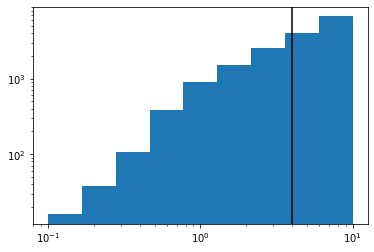

In [9]:
# fig=plt.figure()
# ax = fig.
plt.hist(maxminpT,bins=np.logspace(-1,1,10),log=True)
plt.axvline(4,color='black')
plt.semilogx()
plt.show()

In [10]:
out_data = np.zeros((numpass,50,4))

HT_muon = []
HT_tot = []

for n, index in enumerate(pass_indices):
    if n % 1000 == 0:
        print("Now processing event", n, "of", numpass)
    
    event = np.array(events[index])
    pTs = event[:,2]
    eta = event[:,3]
    
    PIDs = event[:,1]
    neutrinos = [12,14,16]
    
    ismuon = np.logical_and(PIDs == 13,np.abs(eta) < 2.5)
    isantimuon = np.logical_and(PIDs == -13,np.abs(eta) < 2.5)
        
    mu = np.argmax(pTs*ismuon)
    antimu = np.argmax(pTs*isantimuon)
    
    rejected = np.zeros(len(event), dtype=bool)
    rejected[mu] = True
    rejected[antimu] = True
    
    HT_tot += [np.sum(event[:,2])]
    
    pTs_muon = event[rejected,2]
    HT_muon += [np.sum(pTs_muon)]
    
    for neutPID in neutrinos:
        rejected += (np.abs(PIDs) == neutPID)
    
    event = event[np.logical_not(rejected)]
    
    
    pTs = event[:,2]
    etas = event[:,3]
    phis = event[:,4]
    Es = event[:,5]
    
    pxs = pTs*np.cos(phis)
    pys = pTs*np.sin(phis)
    pzs = pTs*np.sinh(etas)
    
    numparts = len(pTs)
    
    particles = []
    for i in range(numparts):
        particles += [fj.PseudoJet(pxs[i],pys[i],pzs[i],Es[i])]
    sequence = fj.ClusterSequence(particles,jet_def)
    reclustered = fj.sorted_by_pt(sequence.exclusive_jets(min(50,numparts)))
    
    
    numparts = min(50,len(reclustered))
    for j in range(numparts):
        particle = reclustered[j]
        out_data[n,j,0] = particle.pt()
        out_data[n,j,1] = particle.eta()
        out_data[n,j,2] = particle.phi() - np.pi
        out_data[n,j,3] = particle.E()
        
#     for j in range(numparts,50):
#         out_data[i,j,1] = jet.Eta
#         out_data[i,j,2] = jet.Phi

Now processing event 0 of 34973
Now processing event 1000 of 34973
Now processing event 2000 of 34973
Now processing event 3000 of 34973
Now processing event 4000 of 34973
Now processing event 5000 of 34973
Now processing event 6000 of 34973
Now processing event 7000 of 34973
Now processing event 8000 of 34973
Now processing event 9000 of 34973
Now processing event 10000 of 34973
Now processing event 11000 of 34973
Now processing event 12000 of 34973
Now processing event 13000 of 34973
Now processing event 14000 of 34973
Now processing event 15000 of 34973
Now processing event 16000 of 34973
Now processing event 17000 of 34973
Now processing event 18000 of 34973
Now processing event 19000 of 34973
Now processing event 20000 of 34973
Now processing event 21000 of 34973
Now processing event 22000 of 34973
Now processing event 23000 of 34973
Now processing event 24000 of 34973
Now processing event 25000 of 34973
Now processing event 26000 of 34973
Now processing event 27000 of 34973
Now p

In [11]:
out_data = out_data.reshape((-1,50*4))

In [12]:
columns = []
for i in range(50):
    columns += ['pT' + str(i), 'eta' + str(i), 'phi' + str(i), 'E' + str(i)]

In [14]:
outstore = pd.HDFStore("/home/jack/projects/EMD_VAE/compression_project/data/h_signal.h5")
dictionary = dict(zip(columns, out_data.T))
out_df = pd.DataFrame(dictionary,columns=columns)
outstore.append('particles',out_df)
outstore.close()

In [25]:
np.random.choice(6)

3